### Digit Recognition Project

In [16]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

### Load data

In [17]:
labeled_images = np.load("labeled_images.npy")
labeled_digits = np.load("labeled_digits.npy")

autograder_images = np.load("autograder_images.npy")

In [3]:
# this is an array containing all the 3750 images of size 28 times 28 pixels:
labeled_images.shape

(3750, 28, 28)

In [4]:
# this is an array containing the digit corresponding to each image:
labeled_digits[0:10]

array([1, 7, 0, 5, 2, 8, 4, 0, 4, 2])

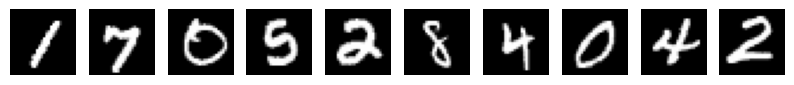

In [25]:
# Number of images to display
num_images = 10

# Set up the plot
plt.figure(figsize=(10, 10))
for i in range(num_images):
    # Create a subplot for each image
    plt.subplot(1, num_images, i + 1)
    # Display the image (assuming grayscale)
    plt.imshow(labeled_images[i], cmap='gray')
    # Turn off axis labels
    plt.axis('off')
plt.show()

### K-Nearest Neighbors Classifier

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'decision__class_weight': None, 'decision__criterion': 'entropy'}
grid.score(X_test, y_test) 0.7533333333333333
accuracyOP 0.7533333333333333


### Logistic Regression Classifier

{'logistic__fit_intercept': True}


### Support Vector Machine Classifier

In [ ]:
# Preprocess the Data
labeled_images_flat = labeled_images.reshape(3750, -1)
labeled_images_flat = labeled_images_flat / 255.0
autograder_images_flat = autograder_images.reshape(len(autograder_images), -1) / 255.0

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    labeled_images_flat, labeled_digits, test_size=0.2)
print(len(X_train))
print(len(X_test))

### Train the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Test the SVM Classifier (Accuracy)
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Use SVM Classifier on the Autograder dataset
#prediction = svm_model.predict(autograder_images_flat)
#result = np.append(accuracy, prediction)
#pd.DataFrame(result).to_csv("autograder.txt", index=False, header=False)

### Decision Tree

### Prepare autograder submission

In the autograder you will need to provide two things: 1) estimate of the accuracy of your model on unseen data, 2) the predictions on the autograder images. For the autograder images we only provide the images and not the class labels. Thus, you cannot compute the accuracy on this data yourself - you need to estimate that with labeled data that is provided (labeled_images, labeled_digits). We will calculate the accuracy for you on the autograder data and you will receive an automatic grade based on this. 

In [ ]:
estimate = np.array([0.7]) # TODO Replace this with your estimate of the accuracy on new data
prediction = np.array([-1] * len(autograder_images)) # TODO Replace this with your predictions of your best model
# For example using something like:
# prediction = my_super_duper_model.predict(autograder_images) 

result = np.append(estimate, prediction)

# The code below will write your estimate and prediction to a file named autograder.txt
# You will need to upload this file to the Vocareum autograder
pd.DataFrame(result).to_csv("autograder.txt", index=False, header=False)